In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.linalg import *

In [1]:
!pip install matchms

In [3]:
import matchms as mt

In [4]:
from matchms.importing import load_from_mgf

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/'

In [7]:
import os

file_mgf = os.path.join(path,
                        "GNPS-NIH-NATURALPRODUCTSLIBRARY.mgf")

In [8]:
spectrums = list(load_from_mgf(file_mgf))

In [9]:
inchikeys = [s.get("inchikey") for s in spectrums]
found_inchikeys = np.sum([1 for x in inchikeys if x is not None])
print(f"Found {int(found_inchikeys)} inchikeys in metadata")

Found 0 inchikeys in metadata


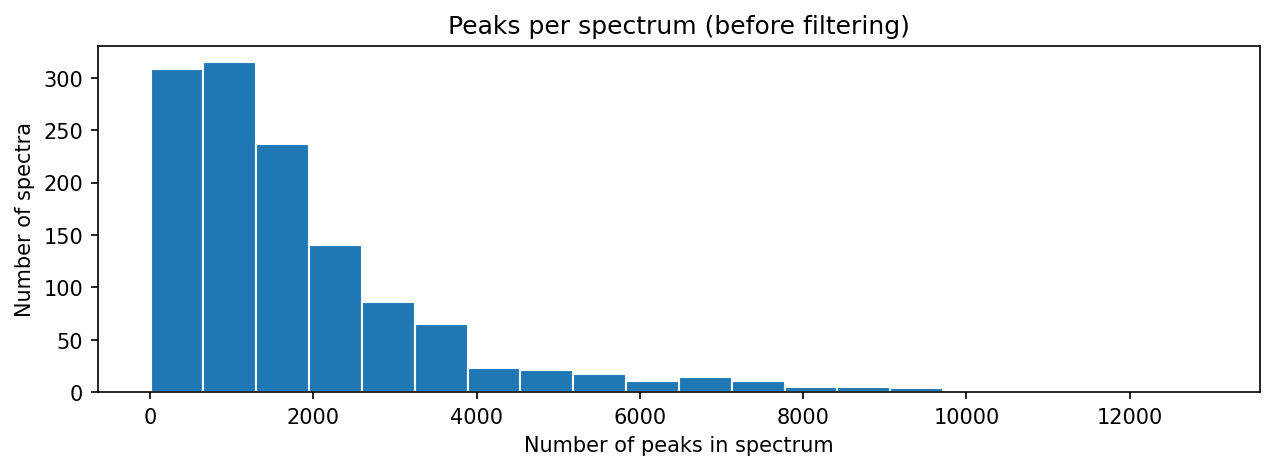

In [10]:
numbers_of_peaks = [len(s.peaks.mz) for s in spectrums]
plt.figure(figsize=(10,3), dpi=150)
plt.hist(numbers_of_peaks, 20, edgecolor="white")
plt.title("Peaks per spectrum (before filtering)")
plt.xlabel("Number of peaks in spectrum")
plt.ylabel("Number of spectra")
plt.show()

In [11]:
import matchms.filtering as ms_filters

def metadata_processing(spectrum):
    spectrum = ms_filters.default_filters(spectrum)
    spectrum = ms_filters.repair_inchi_inchikey_smiles(spectrum)
    spectrum = ms_filters.derive_inchi_from_smiles(spectrum)
    spectrum = ms_filters.derive_smiles_from_inchi(spectrum)
    spectrum = ms_filters.derive_inchikey_from_inchi(spectrum)
    spectrum = ms_filters.harmonize_undefined_smiles(spectrum)
    spectrum = ms_filters.harmonize_undefined_inchi(spectrum)
    spectrum = ms_filters.harmonize_undefined_inchikey(spectrum)
    spectrum = ms_filters.add_precursor_mz(spectrum)
    return spectrum

In [12]:
def peak_processing(spectrum):
    spectrum = ms_filters.default_filters(spectrum)
    spectrum = ms_filters.normalize_intensities(spectrum)
    spectrum = ms_filters.select_by_intensity(spectrum, intensity_from=0.01)
    spectrum = ms_filters.select_by_mz(spectrum, mz_from=10, mz_to=1000)
    return spectrum

In [13]:
spectrums = [metadata_processing(s) for s in spectrums]
spectrums = [peak_processing(s) for s in spectrums]

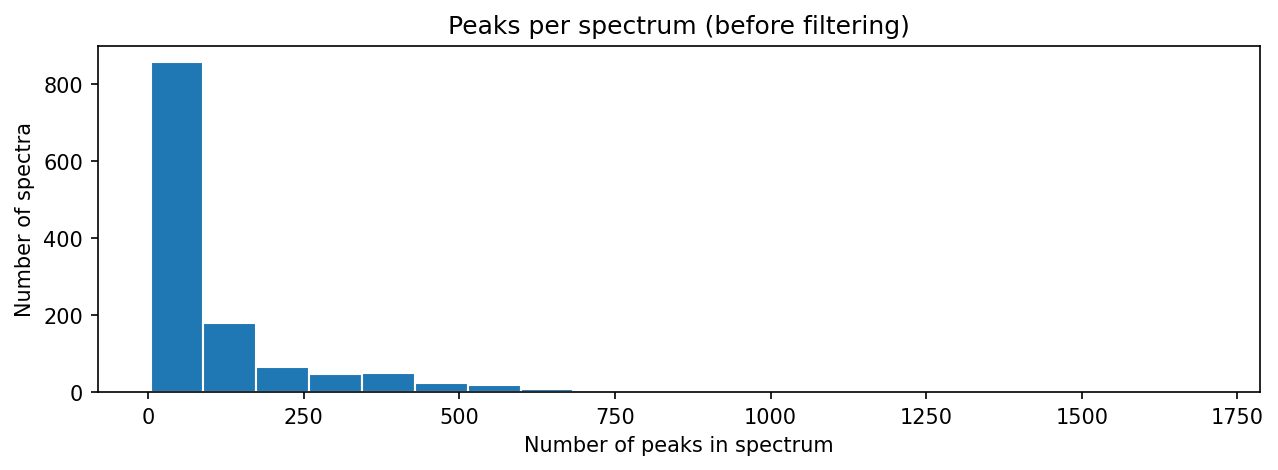

In [14]:
numbers_of_peaks = [len(s.peaks.mz) for s in spectrums]
plt.figure(figsize=(10,3), dpi=150)
plt.hist(numbers_of_peaks, 20, edgecolor="white")
plt.title("Peaks per spectrum (before filtering)")
plt.xlabel("Number of peaks in spectrum")
plt.ylabel("Number of spectra")
plt.show()

In [15]:
inchikeys = [s.get("inchikey") for s in spectrums]
inchikeys[:10]

['XTJNPXYDTGJZSA-PKOBYXMFSA-N',
 'VOYWJNWCKFCMPN-FHERZECASA-N',
 'IRZVHDLBAYNPCT-UHFFFAOYSA-N',
 'OPWCHZIQXUKNMP-RGEXLXHISA-N',
 'GTBYYVAKXYVRHX-BVSLBCMMSA-N',
 'UVZWLAGDMMCHPD-UHFFFAOYSA-N',
 'XKWILXCQJFNUJH-DEOSSOPVSA-N',
 'JDZNIWUNOASRIK-UHFFFAOYSA-N',
 'RCAVVTTVAJETSK-VXKWHMMOSA-N',
 'KQAZJQXFNDOORW-CABCVRRESA-N']

In [16]:
len(inchikeys)

1267

In [17]:
from matchms import calculate_scores
from matchms.similarity import CosineGreedy
similarity_measure = CosineGreedy(tolerance=0.005)